In [1]:
import akshare as ak
import pandas as pd
import numpy as np

In [2]:
STOCK_CODES = ["000858", "600938", "000333", "601088", "601088", "300866", "600900", "600036"]
STOCK_SYMBOLS_1 = [code + ".SH" if code.startswith("6") else code + ".SZ" for code in STOCK_CODES ]
STOCK_SYMBOLS_2 = ['sh' + code if code.startswith("6") else 'sz' + code for code in STOCK_CODES]


In [15]:
for code, stock_symbol_1, stock_symbol_2 in zip(STOCK_CODES, STOCK_SYMBOLS_1, STOCK_SYMBOLS_2):
    print(code, stock_symbol_1, stock_symbol_2)
    
    # load the eps and roe data
    eps_roe_df = ak.stock_financial_analysis_indicator_em(symbol=stock_symbol_1, indicator="按报告期")
    eps_roe_df = eps_roe_df[["REPORT_DATE", "REPORT_TYPE", "REPORT_DATE_NAME", "EPSJB", "ROEJQ"]]

    # rename the columns
    eps_roe_df.columns = ["date", "report_type", "report_date_type", "eps", "roe"]

    # calcualte seasonal eps and roe
    eps_roe_df['eps_shift_1'] = eps_roe_df['eps'].shift(-1)
    eps_roe_df['roe_shift_1'] = eps_roe_df['roe'].shift(-1)
    eps_roe_df['eps_single_season'] = eps_roe_df['eps'] - eps_roe_df['eps_shift_1']
    eps_roe_df['roe_single_season'] = eps_roe_df['roe'] - eps_roe_df['roe_shift_1']
    eps_roe_df['eps_single_season'] = np.where(eps_roe_df['report_type'] == "一季报", eps_roe_df['eps'], eps_roe_df['eps_single_season'])
    eps_roe_df['roe_single_season'] = np.where(eps_roe_df['report_type'] == "一季报", eps_roe_df['roe'], eps_roe_df['roe_single_season'])

    # calculate the ttm eps and roe by totaling the rolling eps and roe in 4 rows
    eps_roe_df['eps_ttm'] = eps_roe_df['eps_single_season'].rolling(4).sum().shift(-3)
    eps_roe_df['roe_ttm'] = eps_roe_df['roe_single_season'].rolling(4).sum().shift(-3)

    # change the datetime format
    eps_roe_df['date'] = pd.to_datetime(eps_roe_df['date']).dt.strftime('%Y-%m-%d')

    print(eps_roe_df.shape)
    # eps_roe_df.head(10)
    
    # load the price data
    price_df = ak.stock_zh_a_hist_tx(symbol=stock_symbol_2, start_date="20050101", adjust="")

    # change the datetime format
    price_df['date'] = pd.to_datetime(price_df['date']).dt.strftime('%Y-%m-%d')

    print(price_df.shape)
    # price_df.head(10)
    
    # combine the price and financial data
    stock_df = pd.merge(price_df, eps_roe_df, on='date', how='left', validate="1:1")

    # fill the missing values with backward filling
    stock_df['eps_ttm'] = stock_df['eps_ttm'].bfill()
    stock_df['roe_ttm'] = stock_df['roe_ttm'].bfill()

    # calculate the pe_ttm and pr_ttm
    stock_df['pe_ttm'] = stock_df['high'] / stock_df['eps_ttm']
    stock_df['pr_ttm'] = stock_df['pe_ttm'] / stock_df['roe_ttm']

    print(stock_df.shape)
    # stock_df.head()
    
    stock_df.to_csv(f'../data/input/stock_{code}.csv', index=False)
    
    

000858 000858.SZ sz000858
(108, 11)


  0%|          | 0/21 [00:00<?, ?it/s]

(4958, 6)
(4958, 18)
600938 600938.SH sh600938
(22, 11)


  0%|          | 0/4 [00:00<?, ?it/s]

(881, 6)
(881, 18)
000333 000333.SZ sz000333
(76, 11)


  0%|          | 0/13 [00:00<?, ?it/s]

(2907, 6)
(2907, 18)
601088 601088.SH sh601088
(79, 11)


  0%|          | 0/19 [00:00<?, ?it/s]

(4339, 6)
(4339, 18)
601088 601088.SH sh601088
(79, 11)


  0%|          | 0/19 [00:00<?, ?it/s]

(4339, 6)
(4339, 18)
300866 300866.SZ sz300866
(35, 11)


  0%|          | 0/6 [00:00<?, ?it/s]

(1283, 6)
(1283, 18)
600900 600900.SH sh600900
(93, 11)


  0%|          | 0/21 [00:00<?, ?it/s]

(4660, 6)
(4660, 18)
600036 600036.SH sh600036
(99, 11)


  0%|          | 0/21 [00:00<?, ?it/s]

(5015, 6)
(5015, 18)


In [39]:
# load the eps and roe data
eps_roe_df = ak.stock_financial_analysis_indicator_em(symbol="600519.SH", indicator="按报告期")
eps_roe_df = eps_roe_df[["REPORT_DATE", "REPORT_TYPE", "REPORT_DATE_NAME", "EPSJB", "ROEJQ"]]

# rename the columns
eps_roe_df.columns = ["date", "report_type", "report_date_type", "eps", "roe"]

# calcualte seasonal eps and roe
eps_roe_df['eps_shift_1'] = eps_roe_df['eps'].shift(-1)
eps_roe_df['roe_shift_1'] = eps_roe_df['roe'].shift(-1)
eps_roe_df['eps_single_season'] = eps_roe_df['eps'] - eps_roe_df['eps_shift_1']
eps_roe_df['roe_single_season'] = eps_roe_df['roe'] - eps_roe_df['roe_shift_1']
eps_roe_df['eps_single_season'] = np.where(eps_roe_df['report_type'] == "一季报", eps_roe_df['eps'], eps_roe_df['eps_single_season'])
eps_roe_df['roe_single_season'] = np.where(eps_roe_df['report_type'] == "一季报", eps_roe_df['roe'], eps_roe_df['roe_single_season'])

# calculate the ttm eps and roe by totaling the rolling eps and roe in 4 rows
eps_roe_df['eps_ttm'] = eps_roe_df['eps_single_season'].rolling(4).sum().shift(-3)
eps_roe_df['roe_ttm'] = eps_roe_df['roe_single_season'].rolling(4).sum().shift(-3)

# change the datetime format
eps_roe_df['date'] = pd.to_datetime(eps_roe_df['date']).dt.strftime('%Y-%m-%d')

print(eps_roe_df.shape)
eps_roe_df.head(10)

(100, 11)


,date,report_type,report_date_type,eps,roe,eps_shift_1,roe_shift_1,eps_single_season,roe_single_season,eps_ttm,roe_ttm
0,2025-09-30,三季报,2025三季报,51.53,24.64,36.18,17.89,15.35,6.75,71.75,34.57
1,2025-06-30,中报,2025中报,36.18,17.89,21.38,10.92,14.80,6.97,71.63,36.28
2,2025-03-31,一季报,2025一季报,21.38,10.92,68.64,36.02,21.38,10.92,70.86,36.37
3,2024-12-31,年报,2024年报,68.64,36.02,48.42,26.09,20.22,9.93,68.64,36.02
4,2024-09-30,三季报,2024三季报,48.42,26.09,33.19,17.63,15.23,8.46,65.82,35.46
5,2024-06-30,中报,2024中报,33.19,17.63,19.16,10.57,14.03,7.06,64.04,35.12
6,2024-03-31,一季报,2024一季报,19.16,10.57,59.49,34.19,19.16,10.57,62.10,34.76
7,2023-12-31,年报,2023年报,59.49,34.19,42.09,24.82,17.40,9.37,59.49,34.19
8,2023-09-30,三季报,2023三季报,42.09,24.82,28.64,16.70,13.45,8.12,56.68,33.17
9,2023-06-30,中报,2023中报,28.64,16.70,16.55,10.00,12.09,6.70,54.85,32.39


In [40]:
eps_roe_df['date'] = pd.to_datetime(eps_roe_df['date'])
eps_roe_df['year'] = eps_roe_df['date'].dt.year
eps_roe_df['month'] = eps_roe_df['date'].dt.month

eps_roe_df.groupby('year').agg({'report_type': 'unique'})

,report_type
year,
1998,[年报]
1999,[年报]
2000,[年报]
2001,"[年报, 中报]"
2002,"[年报, 三季报, 中报, 一季报]"
2003,"[年报, 三季报, 中报, 一季报]"
2004,"[年报, 三季报, 中报, 一季报]"
2005,"[年报, 三季报, 中报, 一季报]"
2006,"[年报, 三季报, 中报, 一季报]"


In [41]:
eps_roe_df = eps_roe_df.set_index(['year', 'month'])
eps_roe_df.head()

date report_type report_date_type    eps    roe  eps_shift_1  \
year month                                                                      
2025 9     2025-09-30         三季报          2025三季报  51.53  24.64        36.18   
     6     2025-06-30          中报           2025中报  36.18  17.89        21.38   
     3     2025-03-31         一季报          2025一季报  21.38  10.92        68.64   
2024 12    2024-12-31          年报           2024年报  68.64  36.02        48.42   
     9     2024-09-30         三季报          2024三季报  48.42  26.09        33.19   

            roe_shift_1  eps_single_season  roe_single_season  eps_ttm  \
year month                                                               
2025 9            17.89              15.35               6.75    71.75   
     6            10.92              14.80               6.97    71.63   
     3            36.02              21.38              10.92    70.86   
2024 12           26.09              20.22               9.93    68.64   
     9            17.63              15.23               8.46    65.82   

            roe_ttm  
year month           
2025 9        34.57  
     6        36.28  
     3        36.37  
2024 12       36.02  
     9        35.46

In [10]:
# load the price data
price_df = ak.stock_zh_a_hist_tx(symbol="sh600519", start_date="20050101", adjust="")

# change the datetime format
price_df['date'] = pd.to_datetime(price_df['date'])

print(price_df.shape)
price_df.head(10)

  0%|          | 0/21 [00:00<?, ?it/s]

(5016, 6)


,date,open,close,high,low,amount
0,2005-01-04,36.40,36.45,36.80,36.00,2348.81
1,2005-01-05,36.40,37.24,37.28,36.23,6139.33
2,2005-01-06,37.00,36.60,37.10,36.50,5523.72
3,2005-01-07,36.50,36.90,37.20,36.50,3002.74
4,2005-01-10,36.90,38.25,38.30,36.90,10718.11
5,2005-01-11,38.26,38.30,38.60,38.20,5003.56
6,2005-01-12,38.28,38.40,38.45,37.88,3389.03
7,2005-01-13,38.10,38.62,38.85,38.10,2883.83
8,2005-01-14,38.45,37.92,38.70,37.70,3338.47
9,2005-01-17,37.45,37.90,38.18,37.11,1812.39


In [23]:
price_df['year'] = price_df['date'].dt.year
price_df['month'] = price_df['date'].dt.month 

price_month = price_df.groupby(['year', 'month']).agg({'open': 'first', 'close': 'last', 
                                                       'high': 'max', 'low': 'min'})
price_month.head()

open  close   high    low
year month                            
2005 1      36.40  39.36  39.80  36.00
     2      39.00  43.50  44.26  38.67
     3      43.90  48.11  50.20  42.20
     4      48.08  53.00  53.53  46.32
     5      52.50  44.57  52.95  43.31

In [46]:
# combine the price and financial data
stock_df = pd.merge(price_month, eps_roe_df, left_index=True, right_index=True, how='left', validate="1:1")

# fill the missing values with backward filling
stock_df['eps_ttm'] = stock_df['eps_ttm'].bfill()
stock_df['roe_ttm'] = stock_df['roe_ttm'].bfill()

# calculate the pe_ttm and pr_ttm
stock_df['pe_ttm'] = stock_df['high'] / stock_df['eps_ttm']
stock_df['pr_ttm'] = stock_df['pe_ttm'] / stock_df['roe_ttm']

print(stock_df.shape)
stock_df.head()

(251, 17)


open  close   high    low       date report_type  \
year month                                                      
2005 1      36.40  39.36  39.80  36.00        NaT         NaN   
     2      39.00  43.50  44.26  38.67        NaT         NaN   
     3      43.90  48.11  50.20  42.20 2005-03-31         一季报   
     4      48.08  53.00  53.53  46.32        NaT         NaN   
     5      52.50  44.57  52.95  43.31        NaT         NaN   

           report_date_type  eps  roe  eps_shift_1  roe_shift_1  \
year month                                                        
2005 1                  NaN  NaN  NaN          NaN          NaN   
     2                  NaN  NaN  NaN          NaN          NaN   
     3              2005一季报  NaN  NaN         2.09        21.32   
     4                  NaN  NaN  NaN          NaN          NaN   
     5                  NaN  NaN  NaN          NaN          NaN   

            eps_single_season  roe_single_season  eps_ttm  roe_ttm     pe_ttm  \
year month                                                                      
2005 1                    NaN                NaN     1.64    30.91  24.268293   
     2                    NaN                NaN     1.64    30.91  26.987805   
     3                    NaN                NaN     1.64    30.91  30.609756   
     4                    NaN                NaN     1.64    30.91  32.640244   
     5                    NaN                NaN     1.64    30.91  32.286585   

              pr_ttm  
year month            
2005 1      0.785128  
     2      0.873109  
     3      0.990287  
     4      1.055977  
     5      1.044535

<Axes: xlabel='year-month', ylabel='pr_ttm'>

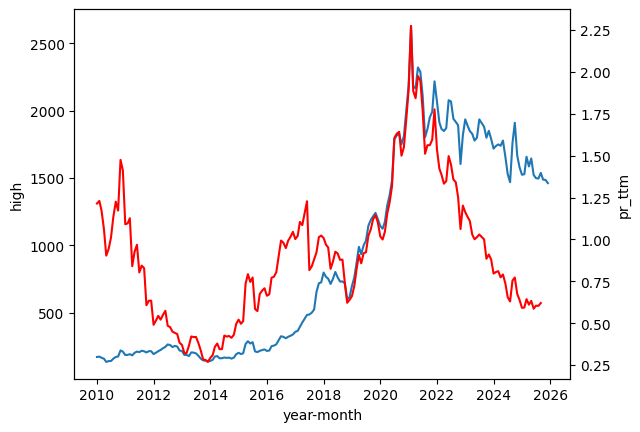

In [61]:
import seaborn as sns 
import matplotlib.pyplot as plt

stock_df['year-month'] = pd.to_datetime(stock_df[['year', 'month']].assign(day=1))
sns.lineplot(data=stock_df.query('year >= 2010'), x='year-month', y='high')
ax2 = plt.twinx()
sns.lineplot(data=stock_df.query('year >= 2010'), x='year-month', y='pr_ttm', color='red', ax=ax2)

<Axes: xlabel='high', ylabel='pr_ttm'>

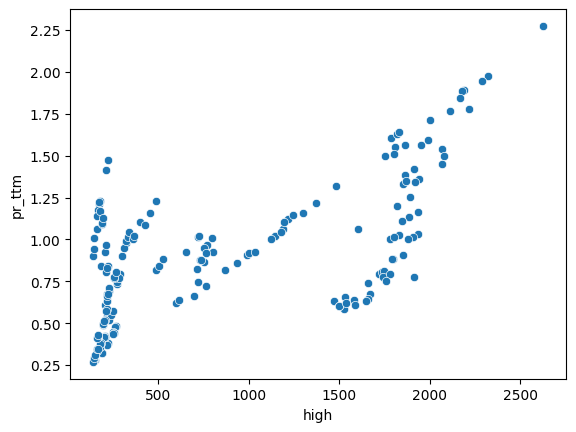

In [62]:
sns.scatterplot(data=stock_df.query('year >= 2010'), x='high', y='pr_ttm')

In [47]:
stock_df = stock_df.reset_index()
stock_df.groupby('year').agg({'report_type': 'unique'})

,report_type
year,
2005,"[nan, 一季报, 中报, 三季报, 年报]"
2006,"[nan, 中报, 三季报, 年报]"
2007,"[nan, 一季报, 中报, 三季报, 年报]"
2008,"[nan, 一季报, 中报, 三季报, 年报]"
2009,"[nan, 一季报, 中报, 三季报, 年报]"
2010,"[nan, 一季报, 中报, 三季报, 年报]"
2011,"[nan, 一季报, 中报, 三季报, 年报]"
2012,"[nan, 一季报, 中报, 三季报, 年报]"
2013,"[nan, 一季报, 中报, 三季报, 年报]"


In [16]:
eps_roe_df.query("report_date_type == '2011年报'")

,date,report_type,report_date_type,eps,roe,eps_shift_1,roe_shift_1,eps_single_season,roe_single_season,eps_ttm,roe_ttm,year
55,2011-12-31,年报,2011年报,8.44,40.39,6.33,31.34,2.11,9.05,8.44,40.39,2011


In [7]:
stock_df.to_csv('../data/input/stock_600519.csv', index=False)

In [48]:
stock_df.query('year == 2006')

,year,month,open,close,high,low,date,report_type,report_date_type,eps,roe,eps_shift_1,roe_shift_1,eps_single_season,roe_single_season,eps_ttm,roe_ttm,pe_ttm,pr_ttm
12,2006,1,45.40,47.24,48.30,44.11,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,29.451220,0.952806
13,2006,2,47.55,62.27,62.50,46.50,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,38.109756,1.232926
14,2006,4,68.50,91.41,93.20,68.50,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,56.829268,1.838540
15,2006,5,45.00,48.02,51.90,37.68,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,31.646341,1.023822
16,2006,6,48.02,47.44,50.10,41.01,2006-06-30,中报,2006中报,0.61,11.27,0.92,NaN,-0.31,NaN,1.64,30.91,30.548780,0.988314
17,2006,7,47.42,44.00,47.42,42.88,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,28.914634,0.935446
18,2006,8,44.00,45.23,46.21,41.08,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,28.176829,0.911576
19,2006,9,45.35,47.43,47.88,43.20,2006-09-30,三季报,2006三季报,1.07,NaN,0.61,11.27,0.46,NaN,1.64,30.91,29.195122,0.944520
20,2006,10,48.01,53.99,55.88,46.80,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,34.073171,1.102335
21,2006,11,53.60,67.75,69.18,52.36,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.64,30.91,42.182927,1.364702


In [55]:
price_month[price_month.index.get_level_values(0) == 2006]

open  close   high    low
year month                            
2006 1      45.40  47.24  48.30  44.11
     2      47.55  62.27  62.50  46.50
     4      68.50  91.41  93.20  68.50
     5      45.00  48.02  51.90  37.68
     6      48.02  47.44  50.10  41.01
     7      47.42  44.00  47.42  42.88
     8      44.00  45.23  46.21  41.08
     9      45.35  47.43  47.88  43.20
     10     48.01  53.99  55.88  46.80
     11     53.60  67.75  69.18  52.36
     12     67.75  87.83  92.10  66.90